# LABORATORIO 4: Codigos de las Señales ECG con BITalino


## Funciones para filtrado de ECG



In [29]:
#Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, iirnotch

Entonces, se definen las funciones de acuerdo al rango necesario para filtrar las señales de ECG, usualmente hasta un paso de banda de 150 Hz.

https://pmc.ncbi.nlm.nih.gov/articles/PMC4624499/



In [30]:
#Definimos filtros con scipy.signal
def filtro_pasabanda(senal, fs, frec_baja=0.5, frec_alta=40.0, orden=4):
    nyquist = 0.5 * fs
    bajo = frec_baja / nyquist
    alto = frec_alta / nyquist
    b, a = butter(orden, [bajo, alto], btype="band")
    return filtfilt(b, a, senal)

def filtro_notch(senal, fs, frec_notch=60.0, Q=30.0):
    nyquist = 0.5 * fs
    w0 = frec_notch / nyquist
    b, a = iirnotch(w0, Q)
    return filtfilt(b, a, senal)

## 1. Reposo


### 1.1 Preprocesado y filtrado para reposo

In [31]:
#Abrimos el archivo sin incluir las filas que inician con"#"
with open("reposo1.txt", "r") as f:
    lineas = f.readlines()

datos_limpios = [line.strip().split() for line in lineas if not line.startswith("#")]
datos = np.array(datos_limpios, dtype=float)

#Señal ECG y tiempo de muestreo
ecg = datos[:, -1] * -1   # señal ECG (última columna)
fs = 1000# frecuencia de muestreo
tiempo = np.arange(len(ecg)) / fs # vector de tiempo

#Aplicacion de filtros
ecg_filtrado = filtro_pasabanda(ecg, fs, 0.5, 40)
ecg_filtrado = filtro_notch(ecg_filtrado, fs, 60)

#FFT
fft_vals_cruda = np.fft.rfft(ecg) # Cruda
fft_freqs_cruda = np.fft.rfftfreq(len(ecg), 1/fs) # Cruda

fft_vals_filtrada = np.fft.rfft(ecg_filtrado) # Filtrada
fft_freqs_filtrada = np.fft.rfftfreq(len(ecg_filtrado), 1/fs) # Filtrada

# FFT en dB
fft_db_cruda = 20 * np.log10(np.abs(fft_vals_cruda) / np.max(np.abs(fft_vals_cruda)))
fft_db_filtrada = 20 * np.log10(np.abs(fft_vals_filtrada) / np.max(np.abs(fft_vals_filtrada)))

### 1.2 Señal cruda

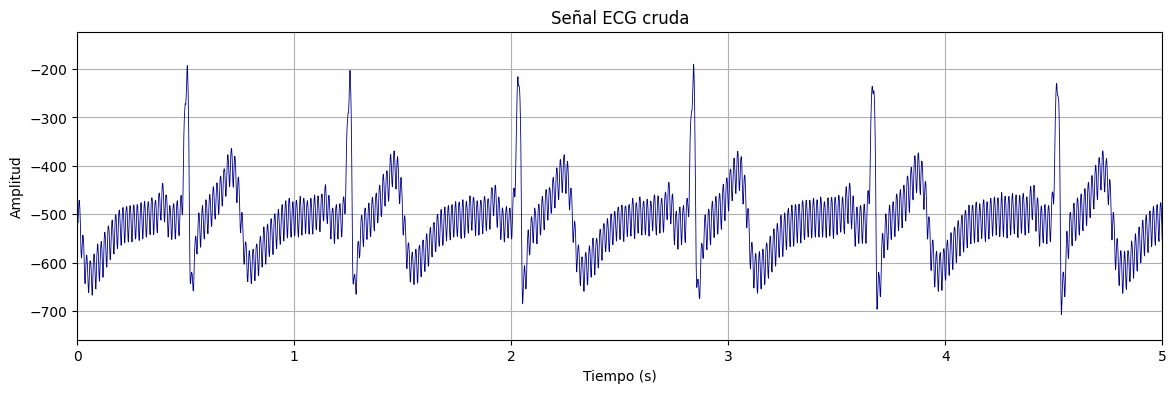

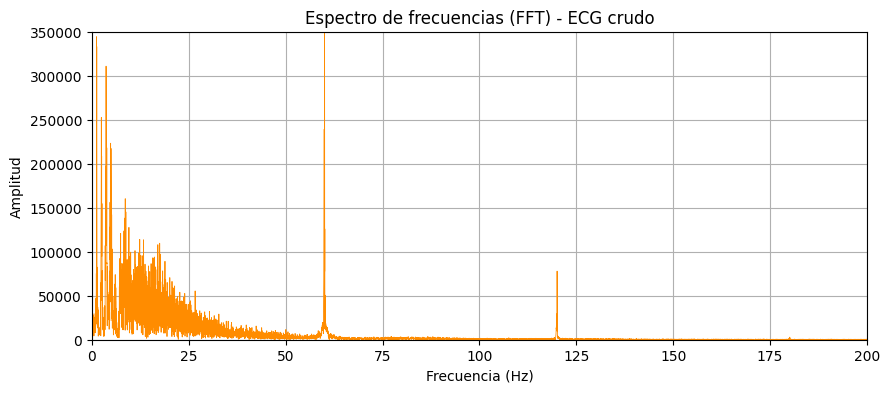

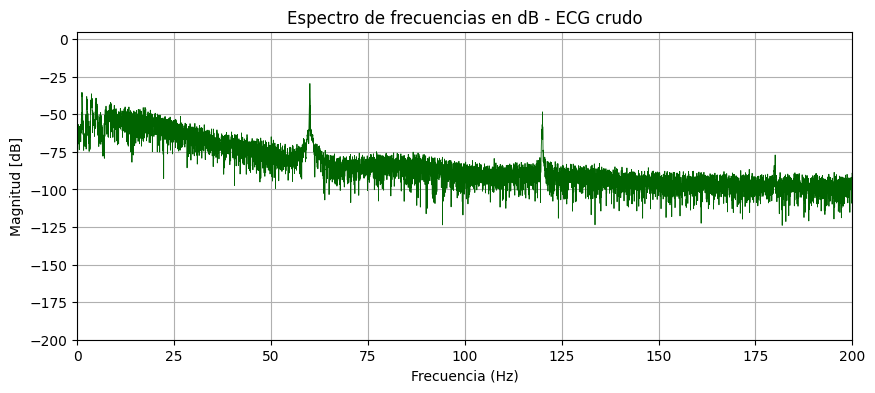

In [32]:
# Ploteo de señales
# Señal cruda
plt.figure(figsize=(14, 4))
plt.plot(tiempo, ecg, color="darkblue", linewidth=0.6)
plt.title("Señal ECG cruda")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.xlim(0, 5)
plt.grid()
plt.show()

# FFT de señal cruda
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_cruda, np.abs(fft_vals_cruda), color="darkorange", linewidth=0.6)
plt.title("Espectro de frecuencias (FFT) - ECG crudo")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim(0, 200)
plt.ylim(0, 350000)
plt.grid()
plt.show()

# FFT de señal cruda en dB
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_cruda, fft_db_cruda, color="darkgreen", linewidth=0.6)
plt.title("Espectro de frecuencias en dB - ECG crudo")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud [dB]")
plt.xlim(0, 200)
plt.ylim(-200, 5)
plt.grid()
plt.show()

### 1.3 Señal filtrada

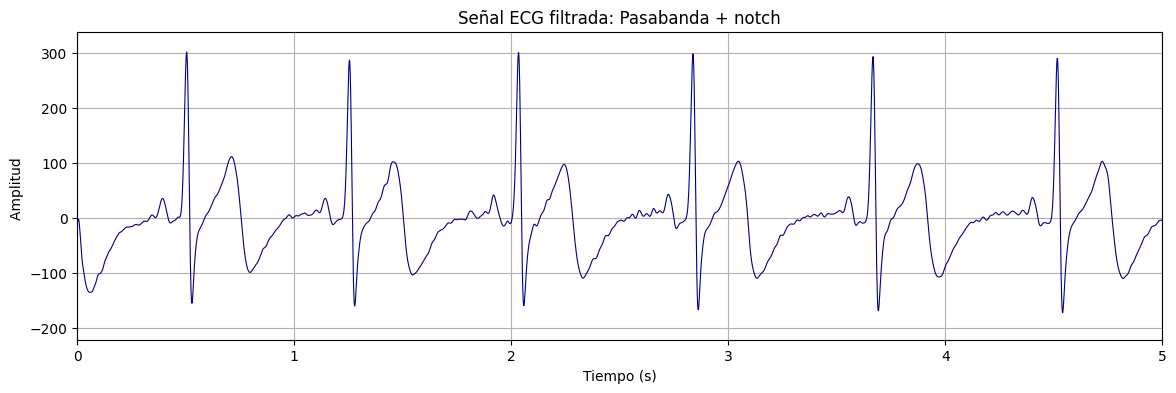

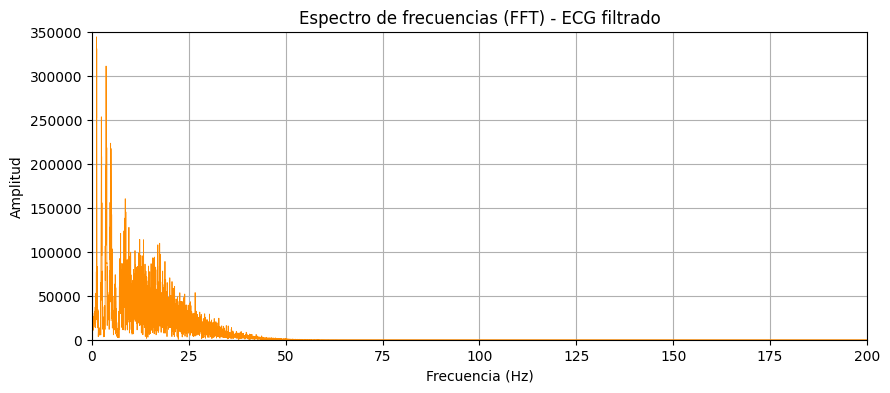

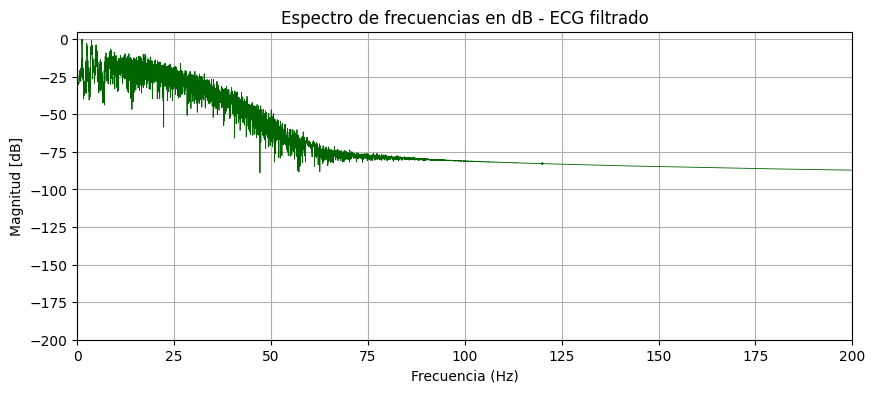

In [33]:
# Señal filtrada
plt.figure(figsize=(14, 4))
plt.plot(tiempo, ecg_filtrado, color="darkblue", linewidth=0.8)
plt.title("Señal ECG filtrada: Pasabanda + notch" )
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud ")
plt.xlim(0, 5)
plt.grid()
plt.show()

# FFT de señal filtrada
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_filtrada, np.abs(fft_vals_filtrada), color="darkorange", linewidth=0.6)
plt.title("Espectro de frecuencias (FFT) - ECG filtrado")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim(0, 200)
plt.ylim(0, 350000)
plt.grid()
plt.show()

# FFT de señal filtrada en dB
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_filtrada, fft_db_filtrada, color="darkgreen", linewidth=0.6)
plt.title("Espectro de frecuencias en dB - ECG filtrado")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud [dB]")
plt.xlim(0, 200)
plt.ylim(-200, 5)
plt.grid()
plt.show()


## 2. Contener respiración (10 segundos)

### 2.1 Preprocesado y filtrado (toma 1)

In [34]:
#Abrimos el archivo sin incluir las filas que inician con"#"
with open("apnea_10seg_toma1.txt", "r") as f:
    lineas = f.readlines()

datos_limpios = [line.strip().split() for line in lineas if not line.startswith("#")]
datos = np.array(datos_limpios, dtype=float)

#Señal ECG y tiempo de muestreo
ecg = datos[:, -1] * -1   # señal ECG (última columna)
fs = 1000# frecuencia de muestreo
tiempo = np.arange(len(ecg)) / fs # vector de tiempo

#Aplicacion de filtros
ecg_filtrado = filtro_pasabanda(ecg, fs, 0.5, 40)
ecg_filtrado = filtro_notch(ecg_filtrado, fs, 60)

#FFT
fft_vals_cruda = np.fft.rfft(ecg) # Cruda
fft_freqs_cruda = np.fft.rfftfreq(len(ecg), 1/fs) # Cruda

fft_vals_filtrada = np.fft.rfft(ecg_filtrado) # Filtrada
fft_freqs_filtrada = np.fft.rfftfreq(len(ecg_filtrado), 1/fs) # Filtrada

# FFT en dB
fft_db_cruda = 20 * np.log10(np.abs(fft_vals_cruda) / np.max(np.abs(fft_vals_cruda)))
fft_db_filtrada = 20 * np.log10(np.abs(fft_vals_filtrada) / np.max(np.abs(fft_vals_filtrada)))

### 2.2 Señal cruda (toma 1)

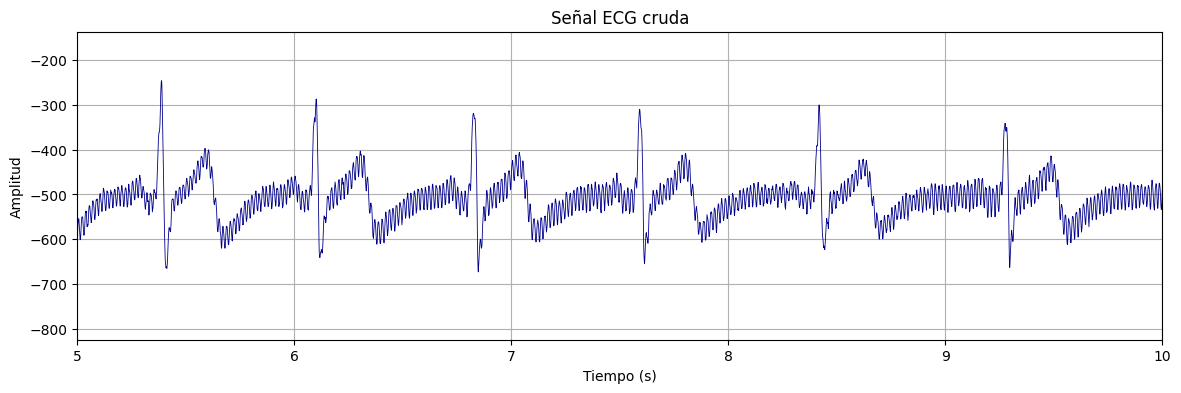

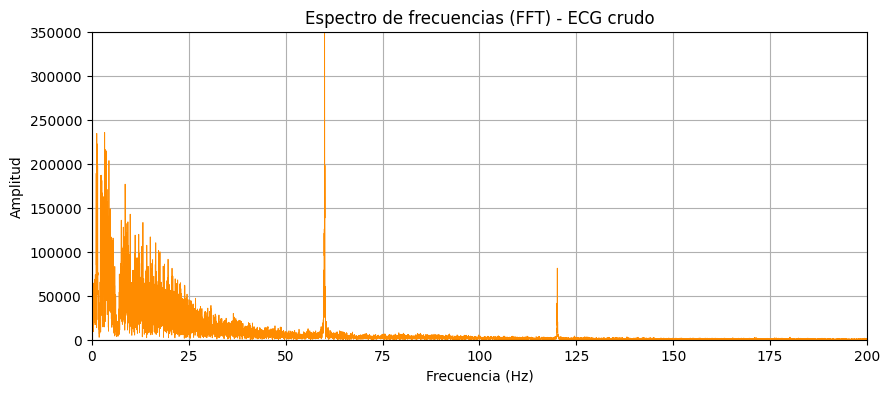

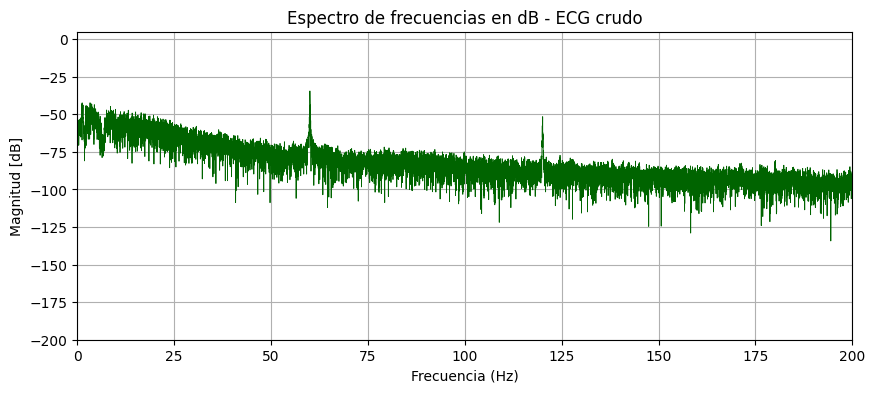

In [35]:
# Ploteo de señales
# Señal cruda
plt.figure(figsize=(14, 4))
plt.plot(tiempo, ecg, color="darkblue", linewidth=0.6)
plt.title("Señal ECG cruda")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.xlim(5, 10)
plt.grid()
plt.show()

# FFT de señal cruda
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_cruda, np.abs(fft_vals_cruda), color="darkorange", linewidth=0.6)
plt.title("Espectro de frecuencias (FFT) - ECG crudo")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim(0, 200)
plt.ylim(0, 350000)
plt.grid()
plt.show()


# FFT de señal cruda en dB
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_cruda, fft_db_cruda, color="darkgreen", linewidth=0.6)
plt.title("Espectro de frecuencias en dB - ECG crudo")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud [dB]")
plt.xlim(0, 200)
plt.ylim(-200, 5)
plt.grid()
plt.show()


### 2.3 Señal filtrada (toma 1)

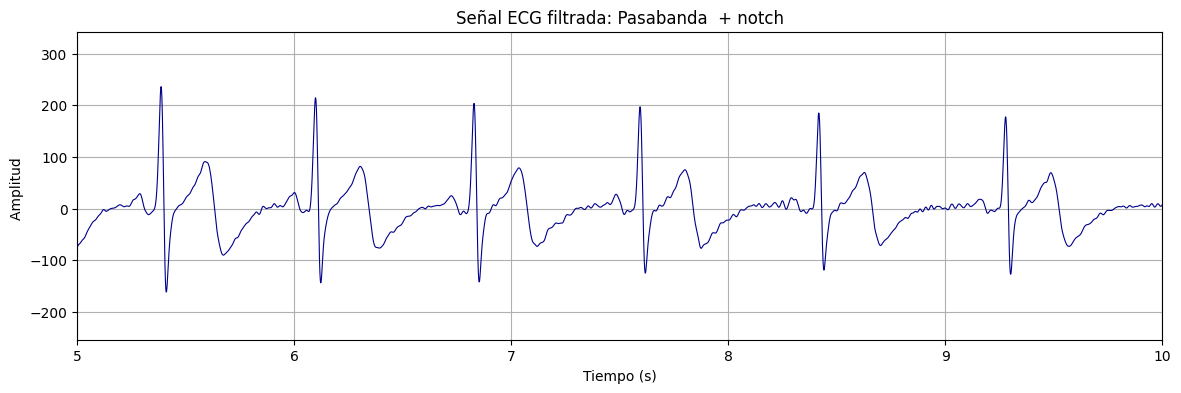

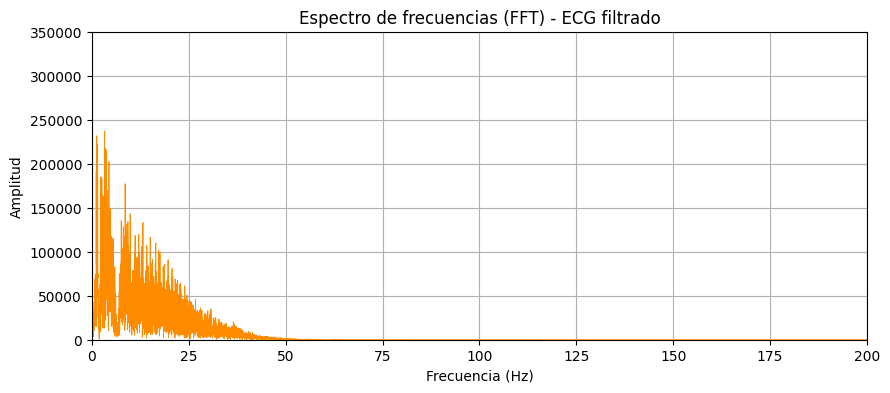

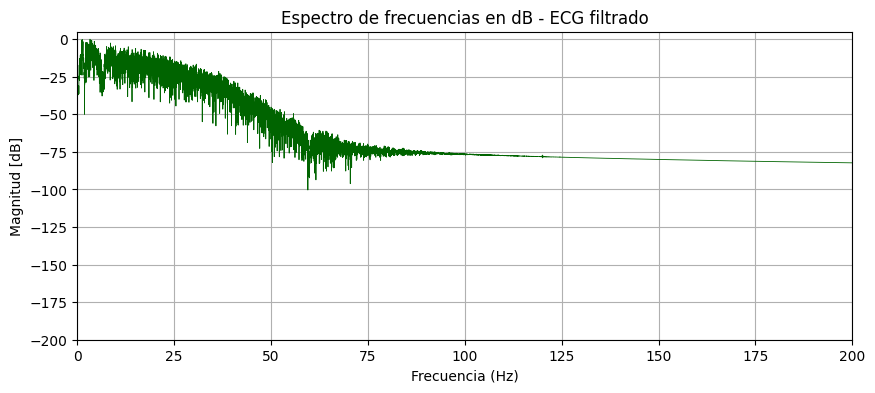

In [36]:
# Señal filtrada
plt.figure(figsize=(14, 4))
plt.plot(tiempo, ecg_filtrado, color="darkblue", linewidth=0.8)
plt.title("Señal ECG filtrada: Pasabanda  + notch" )
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud ")
plt.xlim(5, 10)
plt.grid()
plt.show()

# FFT de señal filtrada
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_filtrada, np.abs(fft_vals_filtrada), color="darkorange", linewidth=0.6)
plt.title("Espectro de frecuencias (FFT) - ECG filtrado")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim(0, 200)
plt.ylim(0, 350000)
plt.grid()
plt.show()

# FFT de señal filtrada en dB
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_filtrada, fft_db_filtrada, color="darkgreen", linewidth=0.6)
plt.title("Espectro de frecuencias en dB - ECG filtrado")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud [dB]")
plt.xlim(0, 200)
plt.ylim(-200, 5)
plt.grid()
plt.show()

### 2.4 Preprocesado y filtrado (toma 2)

In [37]:
#Abrimos el archivo sin incluir las filas que inician con"#"
with open("apnea_10seg_toma2.txt", "r") as f:
    lineas = f.readlines()

datos_limpios = [line.strip().split() for line in lineas if not line.startswith("#")]
datos = np.array(datos_limpios, dtype=float)

#Señal ECG y tiempo de muestreo
ecg = datos[:, -1] * -1   # señal ECG (última columna)
fs = 1000# frecuencia de muestreo
tiempo = np.arange(len(ecg)) / fs # vector de tiempo

#Aplicacion de filtros
ecg_filtrado = filtro_pasabanda(ecg, fs, 0.5, 40)
ecg_filtrado = filtro_notch(ecg_filtrado, fs, 60)

#FFT
fft_vals_cruda = np.fft.rfft(ecg) # Cruda
fft_freqs_cruda = np.fft.rfftfreq(len(ecg), 1/fs) # Cruda

fft_vals_filtrada = np.fft.rfft(ecg_filtrado) # Filtrada
fft_freqs_filtrada = np.fft.rfftfreq(len(ecg_filtrado), 1/fs) # Filtrada

# FFT en dB
fft_db_cruda = 20 * np.log10(np.abs(fft_vals_cruda) / np.max(np.abs(fft_vals_cruda)))
fft_db_filtrada = 20 * np.log10(np.abs(fft_vals_filtrada) / np.max(np.abs(fft_vals_filtrada)))

### 2.5 Señal cruda (toma 2)

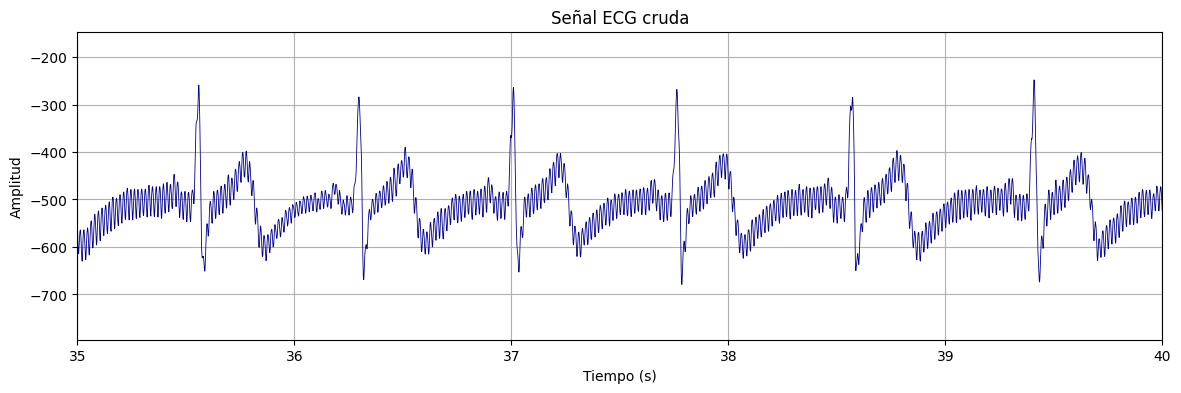

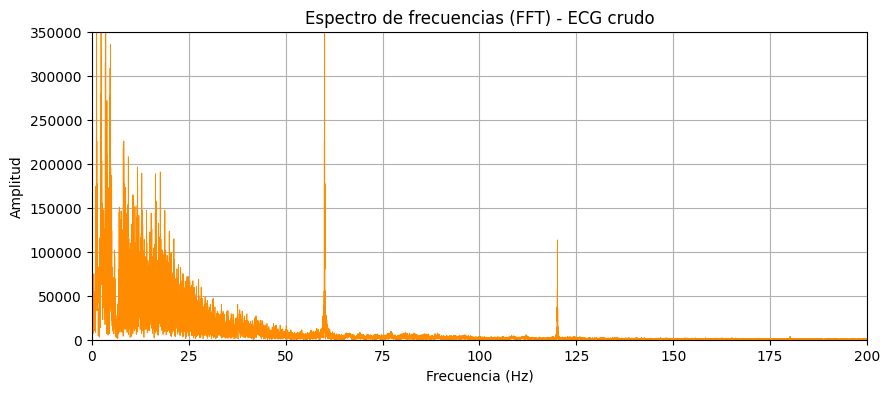

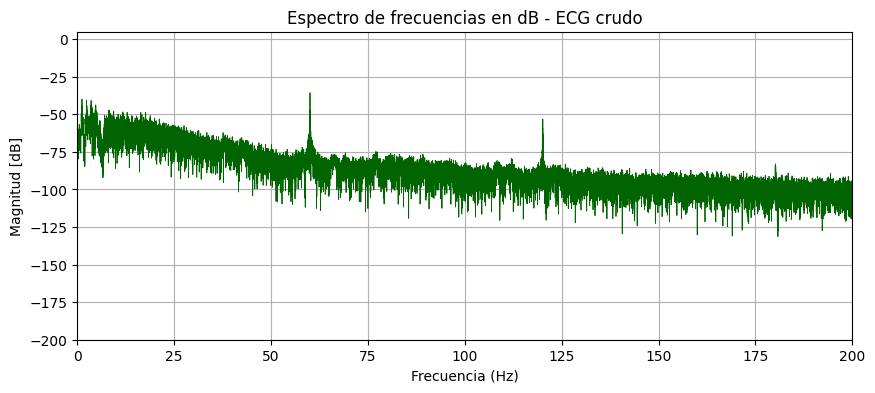

In [38]:
# Ploteo de señales
# Señal cruda
plt.figure(figsize=(14, 4))
plt.plot(tiempo, ecg, color="darkblue", linewidth=0.6)
plt.title("Señal ECG cruda")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.xlim(35, 40)
plt.grid()
plt.show()

# FFT de señal cruda
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_cruda, np.abs(fft_vals_cruda), color="darkorange", linewidth=0.6)
plt.title("Espectro de frecuencias (FFT) - ECG crudo")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim(0, 200)
plt.ylim(0, 350000)
plt.grid()
plt.show()


# FFT de señal cruda en dB
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_cruda, fft_db_cruda, color="darkgreen", linewidth=0.6)
plt.title("Espectro de frecuencias en dB - ECG crudo")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud [dB]")
plt.xlim(0, 200)
plt.ylim(-200, 5)
plt.grid()
plt.show()


### 2.6 Señal filtrada (toma 2)

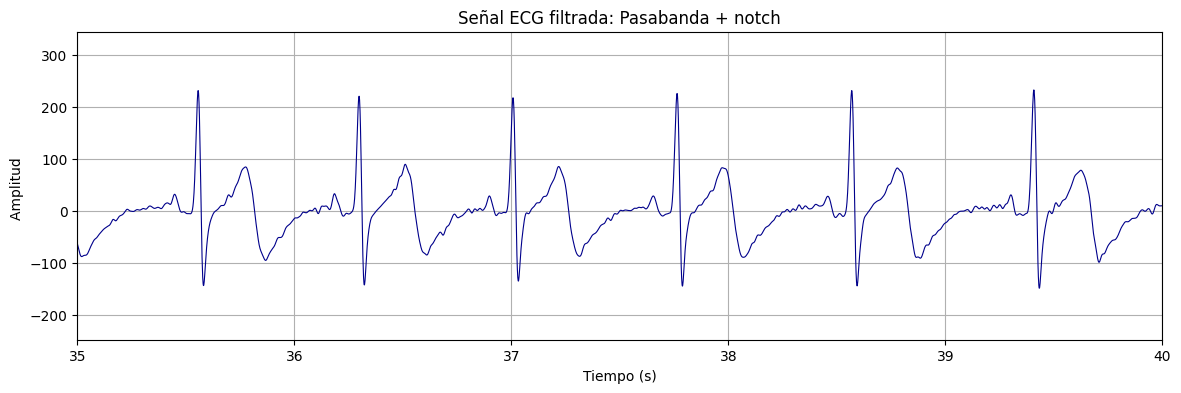

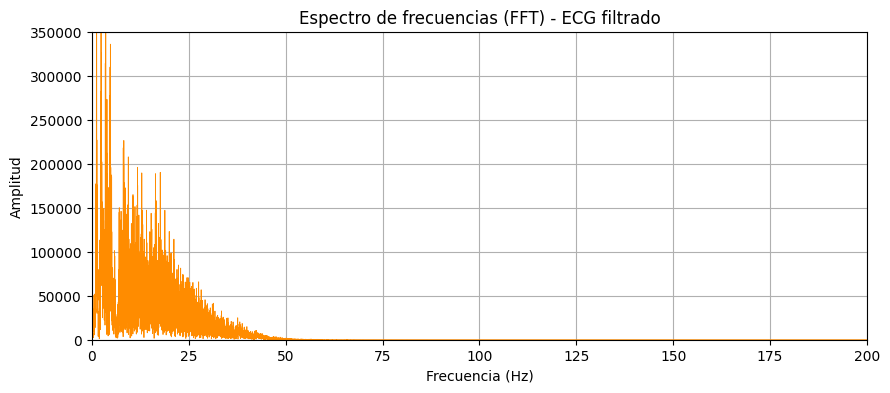

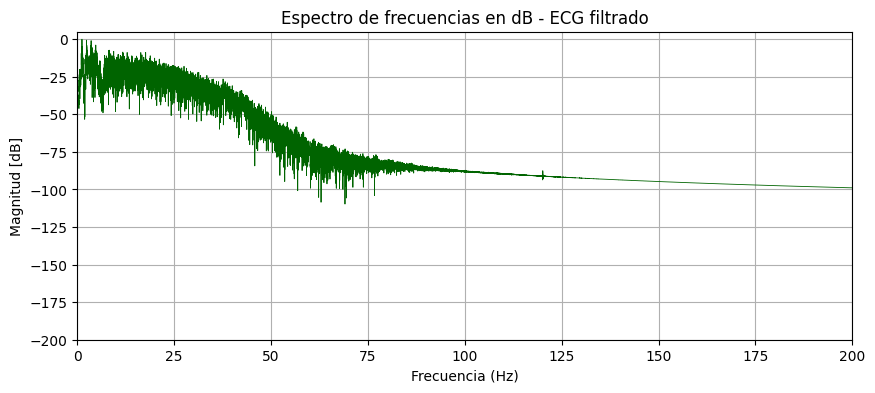

In [39]:
# Señal filtrada-zoom
plt.figure(figsize=(14, 4))
plt.plot(tiempo, ecg_filtrado, color="darkblue", linewidth=0.8)
plt.title("Señal ECG filtrada: Pasabanda + notch" )
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud ")
plt.xlim(35, 40)
plt.grid()
plt.show()

# FFT de señal filtrada
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_filtrada, np.abs(fft_vals_filtrada), color="darkorange", linewidth=0.6)
plt.title("Espectro de frecuencias (FFT) - ECG filtrado")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim(0, 200)
plt.ylim(0, 350000)
plt.grid()
plt.show()

# FFT de señal filtrada en dB
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_filtrada, fft_db_filtrada, color="darkgreen", linewidth=0.6)
plt.title("Espectro de frecuencias en dB - ECG filtrado")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud [dB]")
plt.xlim(0, 200)
plt.ylim(-200, 5)
plt.grid()
plt.show()

### 2.7 Preprocesado y filtrado (toma 3)

In [40]:
#Abrimos el archivo sin incluir las filas que inician con"#"
with open("apnea_10seg_toma3.txt", "r") as f:
    lineas = f.readlines()

datos_limpios = [line.strip().split() for line in lineas if not line.startswith("#")]
datos = np.array(datos_limpios, dtype=float)

#Señal ECG y tiempo de muestreo
ecg = datos[:, -1] * -1   # señal ECG (última columna)
fs = 1000# frecuencia de muestreo
tiempo = np.arange(len(ecg)) / fs # vector de tiempo

#Aplicacion de filtros
ecg_filtrado = filtro_pasabanda(ecg, fs, 0.5, 40)
ecg_filtrado = filtro_notch(ecg_filtrado, fs, 60)

#FFT
fft_vals_cruda = np.fft.rfft(ecg) # Cruda
fft_freqs_cruda = np.fft.rfftfreq(len(ecg), 1/fs) # Cruda

fft_vals_filtrada = np.fft.rfft(ecg_filtrado) # Filtrada
fft_freqs_filtrada = np.fft.rfftfreq(len(ecg_filtrado), 1/fs) # Filtrada

# FFT en dB
fft_db_cruda = 20 * np.log10(np.abs(fft_vals_cruda) / np.max(np.abs(fft_vals_cruda)))
fft_db_filtrada = 20 * np.log10(np.abs(fft_vals_filtrada) / np.max(np.abs(fft_vals_filtrada)))

### 2.8 Señal cruda (toma 3)

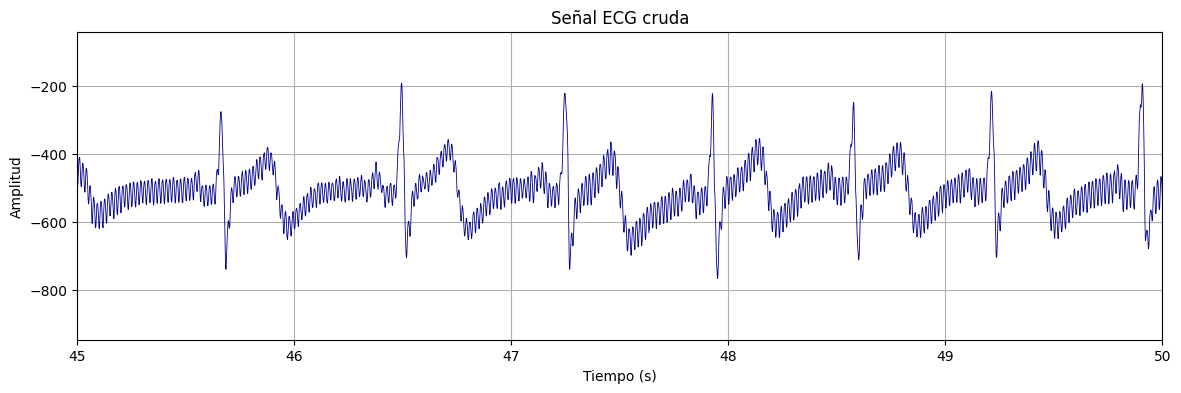

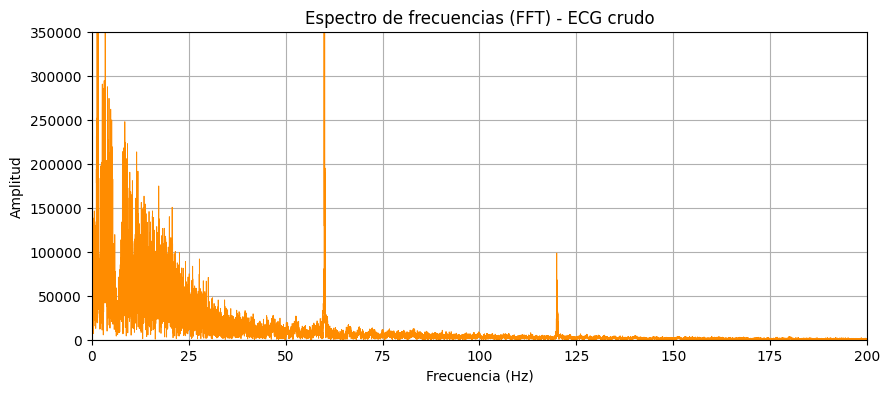

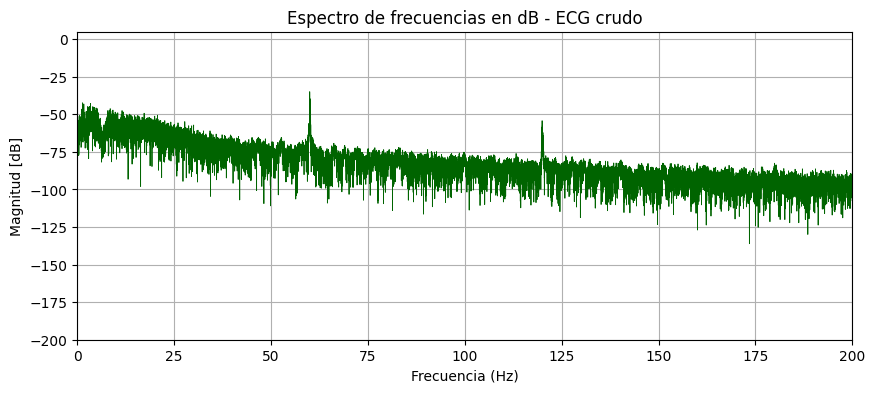

In [41]:
# Ploteo de señales
# Señal cruda
plt.figure(figsize=(14, 4))
plt.plot(tiempo, ecg, color="darkblue", linewidth=0.6)
plt.title("Señal ECG cruda")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.xlim(45, 50)
plt.grid()
plt.show()

# FFT de señal cruda
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_cruda, np.abs(fft_vals_cruda), color="darkorange", linewidth=0.6)
plt.title("Espectro de frecuencias (FFT) - ECG crudo")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim(0, 200)
plt.ylim(0, 350000)
plt.grid()
plt.show()


# FFT de señal cruda en dB
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_cruda, fft_db_cruda, color="darkgreen", linewidth=0.6)
plt.title("Espectro de frecuencias en dB - ECG crudo")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud [dB]")
plt.xlim(0, 200)
plt.ylim(-200, 5)
plt.grid()
plt.show()


### 2.9 Señal filtrada (toma 3)

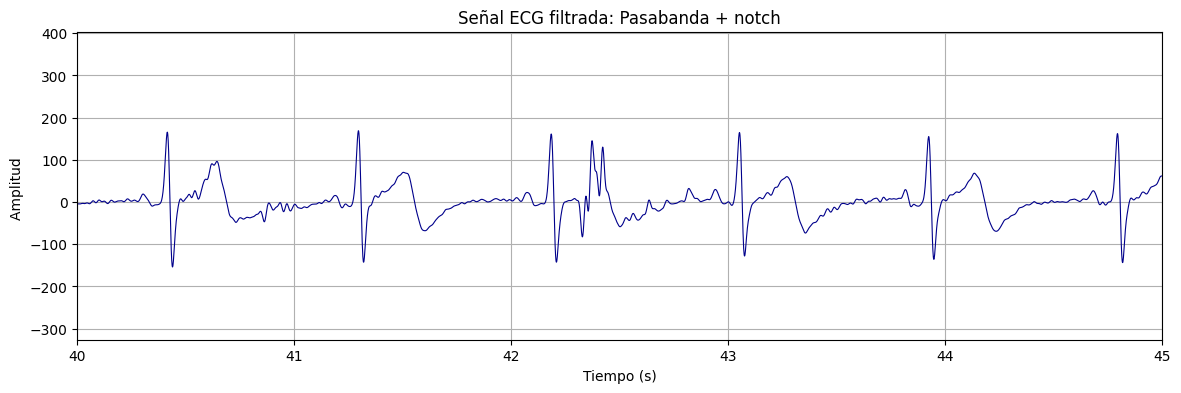

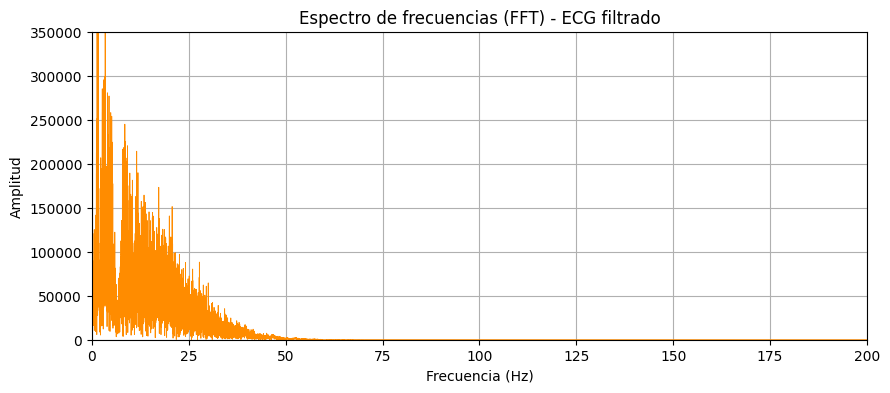

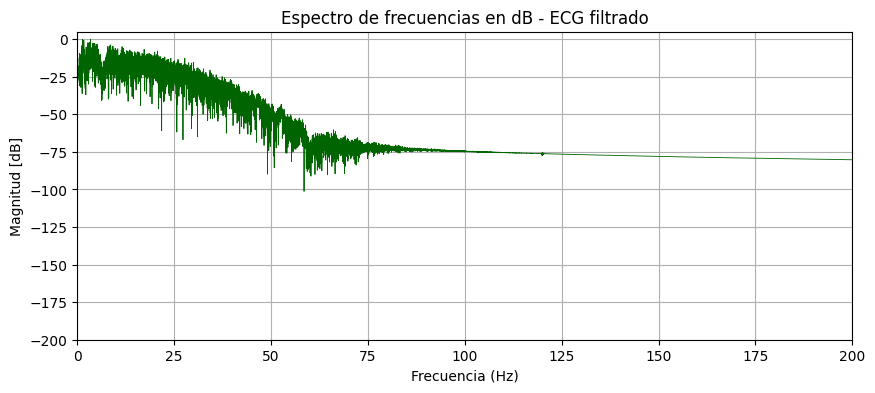

In [42]:
# Señal filtrada
plt.figure(figsize=(14, 4))
plt.plot(tiempo, ecg_filtrado, color="darkblue", linewidth=0.8)
plt.title("Señal ECG filtrada: Pasabanda + notch" )
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud ")
plt.xlim(40, 45)
plt.grid()
plt.show()

# FFT de señal filtrada
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_filtrada, np.abs(fft_vals_filtrada), color="darkorange", linewidth=0.6)
plt.title("Espectro de frecuencias (FFT) - ECG filtrado")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim(0, 200)
plt.ylim(0, 350000)
plt.grid()
plt.show()

# FFT de señal filtrada en dB
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_filtrada, fft_db_filtrada, color="darkgreen", linewidth=0.6)
plt.title("Espectro de frecuencias en dB - ECG filtrado")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud [dB]")
plt.xlim(0, 200)
plt.ylim(-200, 5)
plt.grid()
plt.show()

## 3. Descanso (1 minuto)

### 3.1 Preprocesado y filtrado

In [58]:
#Abrimos el archivo sin incluir las filas que inician con"#"
with open("descanso_1_minuto.txt", "r") as f:
    lineas = f.readlines()

datos_limpios = [line.strip().split() for line in lineas if not line.startswith("#")]
datos = np.array(datos_limpios, dtype=float)

#Señal ECG y tiempo de muestreo
ecg = datos[:, -1] * -1   # señal ECG (última columna)
fs = 1000# frecuencia de muestreo
tiempo = np.arange(len(ecg)) / fs # vector de tiempo

#Aplicacion de filtros
ecg_filtrado = filtro_pasabanda(ecg, fs, 0.5, 100)
ecg_filtrado = filtro_notch(ecg_filtrado, fs, 60)

#FFT
fft_vals_cruda = np.fft.rfft(ecg) # Cruda
fft_freqs_cruda = np.fft.rfftfreq(len(ecg), 1/fs) # Cruda

fft_vals_filtrada = np.fft.rfft(ecg_filtrado) # Filtrada
fft_freqs_filtrada = np.fft.rfftfreq(len(ecg_filtrado), 1/fs) # Filtrada

# FFT en dB
fft_db_cruda = 20 * np.log10(np.abs(fft_vals_cruda) / np.max(np.abs(fft_vals_cruda)))
fft_db_filtrada = 20 * np.log10(np.abs(fft_vals_filtrada) / np.max(np.abs(fft_vals_filtrada)))

### 3.2 Señal cruda

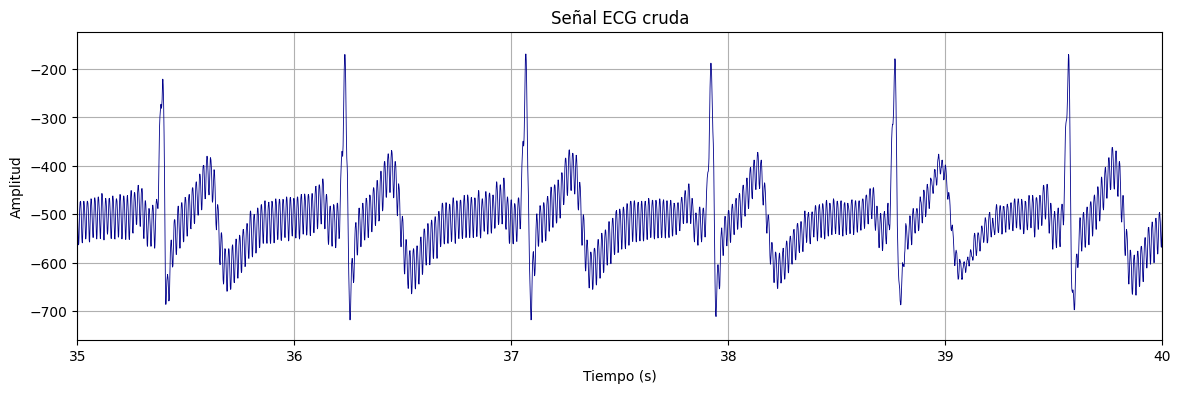

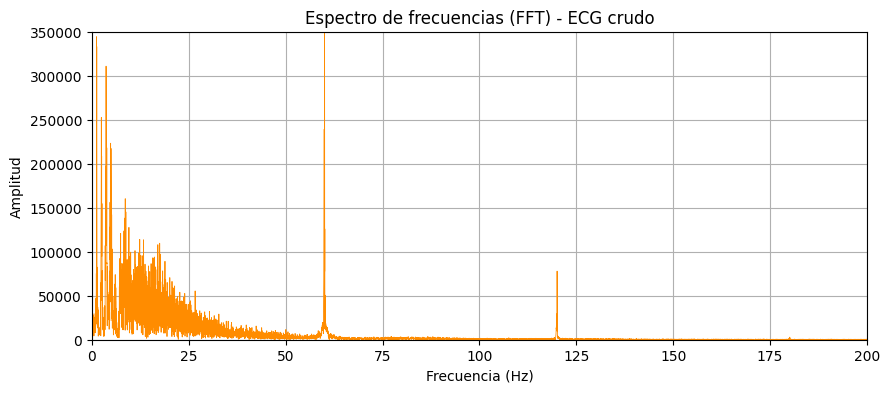

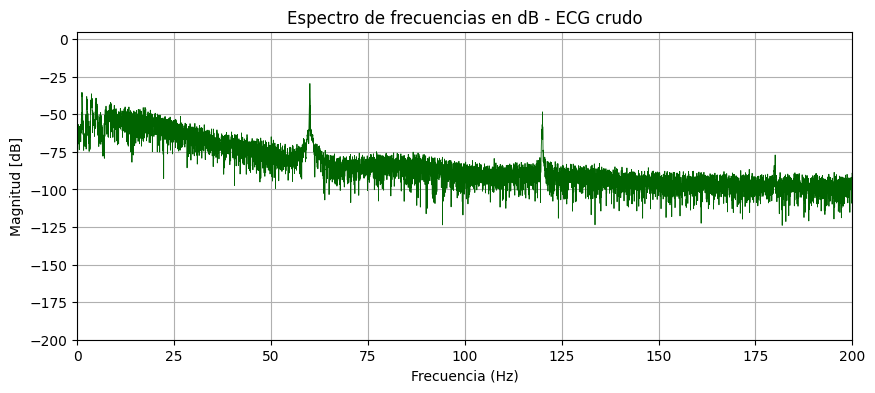

In [59]:
# Ploteo de señales
# Señal cruda
plt.figure(figsize=(14, 4))
plt.plot(tiempo, ecg, color="darkblue", linewidth=0.6)
plt.title("Señal ECG cruda")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.xlim(35, 40)
plt.grid()
plt.show()

# FFT de señal cruda
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_cruda, np.abs(fft_vals_cruda), color="darkorange", linewidth=0.6)
plt.title("Espectro de frecuencias (FFT) - ECG crudo")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim(0, 200)
plt.ylim(0, 350000)
plt.grid()
plt.show()


# FFT de señal cruda en dB
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_cruda, fft_db_cruda, color="darkgreen", linewidth=0.6)
plt.title("Espectro de frecuencias en dB - ECG crudo")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud [dB]")
plt.xlim(0, 200)
plt.ylim(-200, 5)
plt.grid()
plt.show()


### 3.3 Señal filtrada

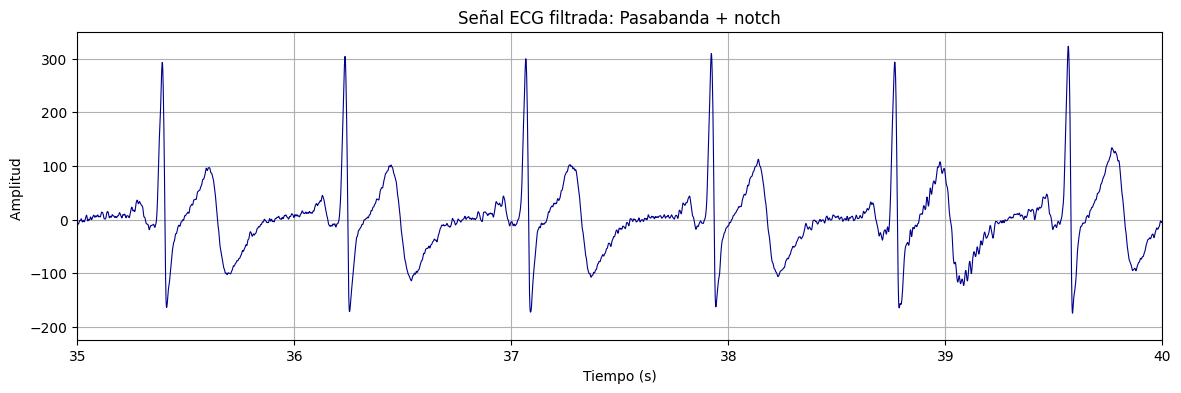

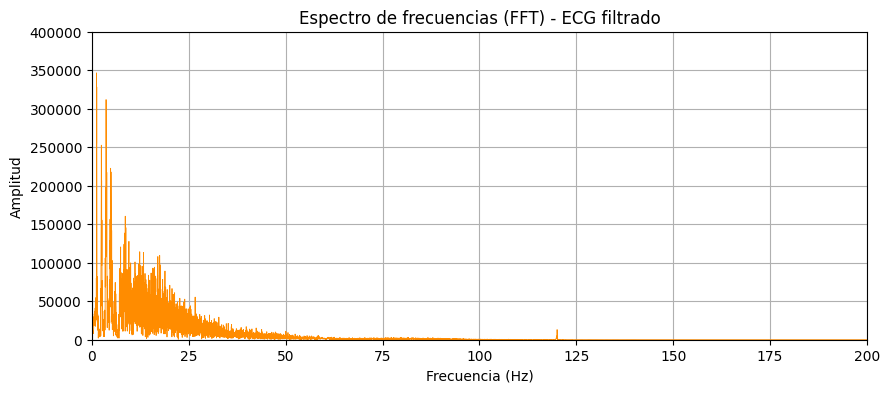

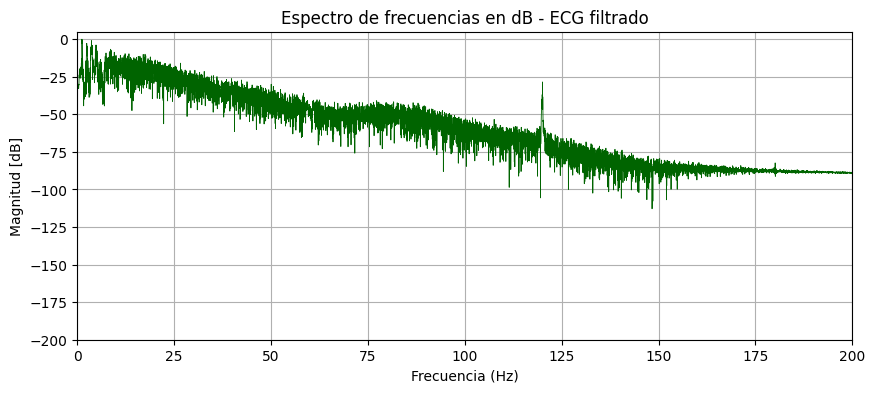

In [60]:
# Señal filtrada
plt.figure(figsize=(14, 4))
plt.plot(tiempo, ecg_filtrado, color="darkblue", linewidth=0.8)
plt.title("Señal ECG filtrada: Pasabanda + notch" )
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud ")
plt.xlim(35, 40)
plt.grid()
plt.show()

# FFT de señal filtrada
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_filtrada, np.abs(fft_vals_filtrada), color="darkorange", linewidth=0.6)
plt.title("Espectro de frecuencias (FFT) - ECG filtrado")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim(0, 200)
plt.ylim(0, 400000)
plt.grid()
plt.show()

# FFT de señal filtrada en dB
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_filtrada, fft_db_filtrada, color="darkgreen", linewidth=0.6)
plt.title("Espectro de frecuencias en dB - ECG filtrado")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud [dB]")
plt.xlim(0, 200)
plt.ylim(-200, 5)
plt.grid()
plt.show()

## 4. Actividad fisica (15 minutos)

### 4.1 Preprocesado y filtrado (toma 1)

In [46]:
#Abrimos el archivo sin incluir las filas que inician con"#"
with open("actividad_aerobica_1.txt", "r") as f:
    lineas = f.readlines()

datos_limpios = [line.strip().split() for line in lineas if not line.startswith("#")]
datos = np.array(datos_limpios, dtype=float)

#Señal ECG y tiempo de muestreo
ecg = datos[:, -1] * -1   # señal ECG (última columna)
fs = 1000# frecuencia de muestreo
tiempo = np.arange(len(ecg)) / fs # vector de tiempo

#Aplicacion de filtros
ecg_filtrado = filtro_pasabanda(ecg, fs, 0.5, 40)
ecg_filtrado = filtro_notch(ecg_filtrado, fs, 60)

#FFT
fft_vals_cruda = np.fft.rfft(ecg) # Cruda
fft_freqs_cruda = np.fft.rfftfreq(len(ecg), 1/fs) # Cruda

fft_vals_filtrada = np.fft.rfft(ecg_filtrado) # Filtrada
fft_freqs_filtrada = np.fft.rfftfreq(len(ecg_filtrado), 1/fs) # Filtrada

# FFT en dB
fft_db_cruda = 20 * np.log10(np.abs(fft_vals_cruda) / np.max(np.abs(fft_vals_cruda)))
fft_db_filtrada = 20 * np.log10(np.abs(fft_vals_filtrada) / np.max(np.abs(fft_vals_filtrada)))

### 4.2 Señal cruda (toma 1)

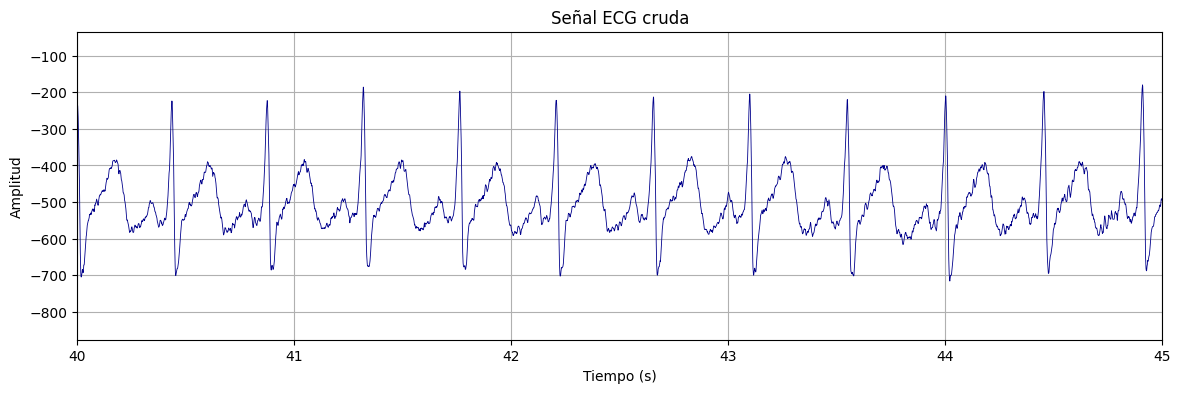

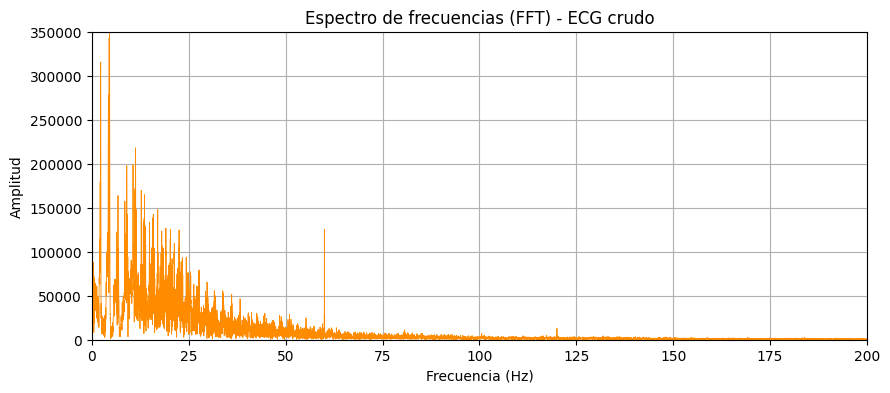

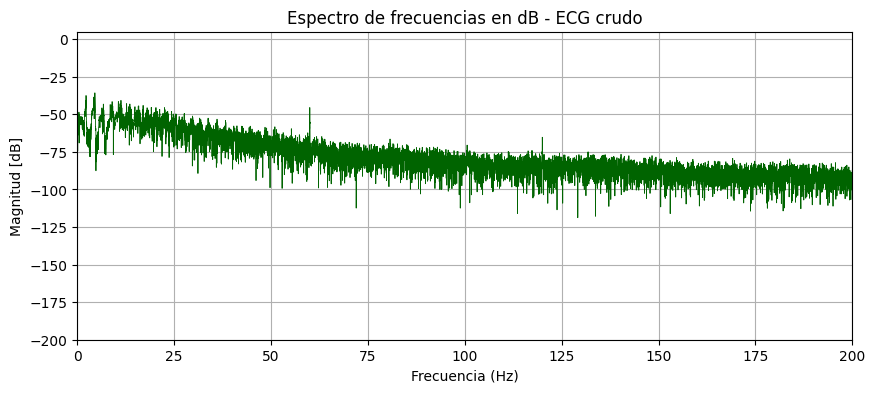

In [47]:
# Ploteo de señales
# Señal cruda
plt.figure(figsize=(14, 4))
plt.plot(tiempo, ecg, color="darkblue", linewidth=0.6)
plt.title("Señal ECG cruda")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.xlim(40, 45)
plt.grid()
plt.show()

# FFT de señal cruda
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_cruda, np.abs(fft_vals_cruda), color="darkorange", linewidth=0.6)
plt.title("Espectro de frecuencias (FFT) - ECG crudo")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim(0, 200)
plt.ylim(0, 350000)
plt.grid()
plt.show()


# FFT de señal cruda en dB
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_cruda, fft_db_cruda, color="darkgreen", linewidth=0.6)
plt.title("Espectro de frecuencias en dB - ECG crudo")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud [dB]")
plt.xlim(0, 200)
plt.ylim(-200, 5)
plt.grid()
plt.show()


### 4.3 Señal filtrada (toma 1)

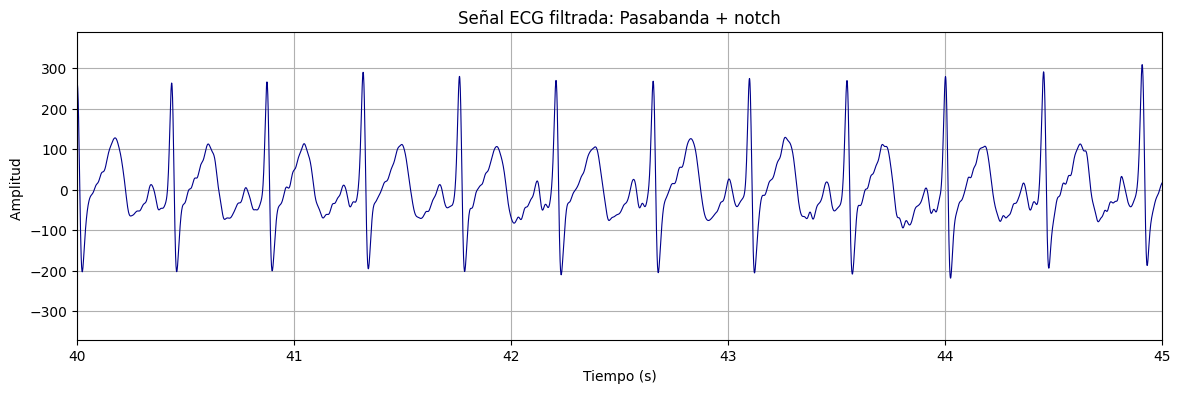

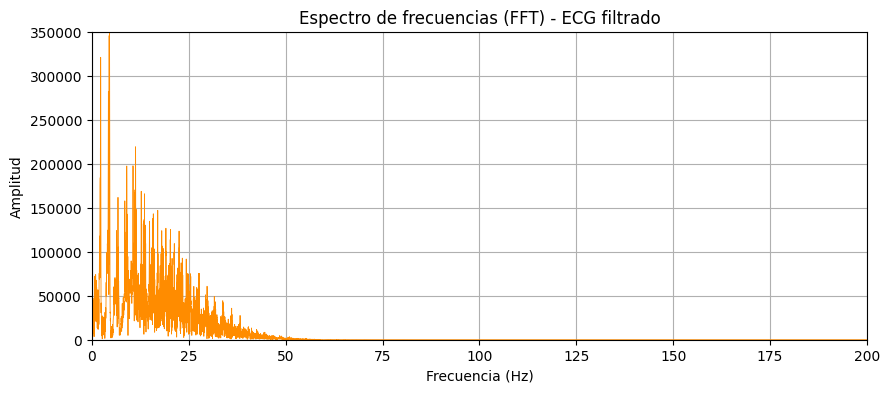

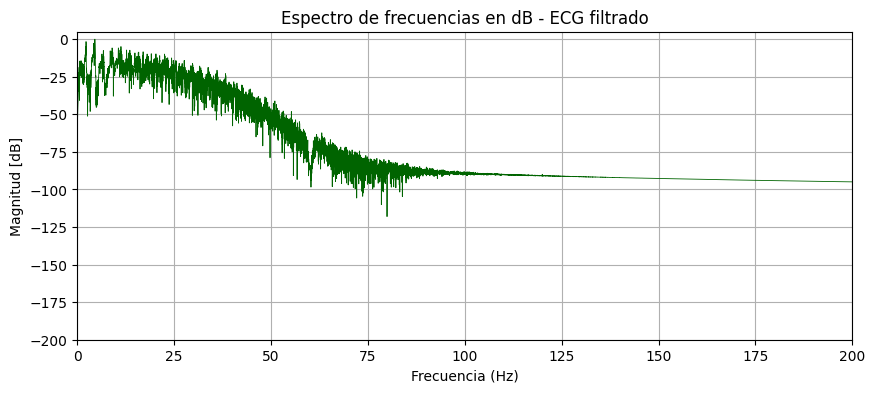

In [48]:
# Señal filtrada-zoom
plt.figure(figsize=(14, 4))
plt.plot(tiempo, ecg_filtrado, color="darkblue", linewidth=0.8)
plt.title("Señal ECG filtrada: Pasabanda + notch" )
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud ")
plt.xlim(40, 45)
plt.grid()
plt.show()

# FFT de señal filtrada
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_filtrada, np.abs(fft_vals_filtrada), color="darkorange", linewidth=0.6)
plt.title("Espectro de frecuencias (FFT) - ECG filtrado")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim(0, 200)
plt.ylim(0, 350000)
plt.grid()
plt.show()

# FFT de señal filtrada en dB
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_filtrada, fft_db_filtrada, color="darkgreen", linewidth=0.6)
plt.title("Espectro de frecuencias en dB - ECG filtrado")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud [dB]")
plt.xlim(0, 200)
plt.ylim(-200, 5)
plt.grid()
plt.show()

### 4.4 Preprocesado y filtrado (toma 2)

In [50]:
#Abrimos el archivo sin incluir las filas que inician con"#"
with open("actividad_aerobica_2.txt", "r") as f:
    lineas = f.readlines()

datos_limpios = [line.strip().split() for line in lineas if not line.startswith("#")]
datos = np.array(datos_limpios, dtype=float)

#Señal ECG y tiempo de muestreo
ecg = datos[:, -1] * -1   # señal ECG (última columna)
fs = 1000# frecuencia de muestreo
tiempo = np.arange(len(ecg)) / fs # vector de tiempo

#Aplicacion de filtros
ecg_filtrado = filtro_pasabanda(ecg, fs, 0.5, 40)
ecg_filtrado = filtro_notch(ecg_filtrado, fs, 60)

#FFT
fft_vals_cruda = np.fft.rfft(ecg) # Cruda
fft_freqs_cruda = np.fft.rfftfreq(len(ecg), 1/fs) # Cruda

fft_vals_filtrada = np.fft.rfft(ecg_filtrado) # Filtrada
fft_freqs_filtrada = np.fft.rfftfreq(len(ecg_filtrado), 1/fs) # Filtrada

# FFT en dB
fft_db_cruda = 20 * np.log10(np.abs(fft_vals_cruda) / np.max(np.abs(fft_vals_cruda)))
fft_db_filtrada = 20 * np.log10(np.abs(fft_vals_filtrada) / np.max(np.abs(fft_vals_filtrada)))

### 4.5 Señal cruda (toma 2)

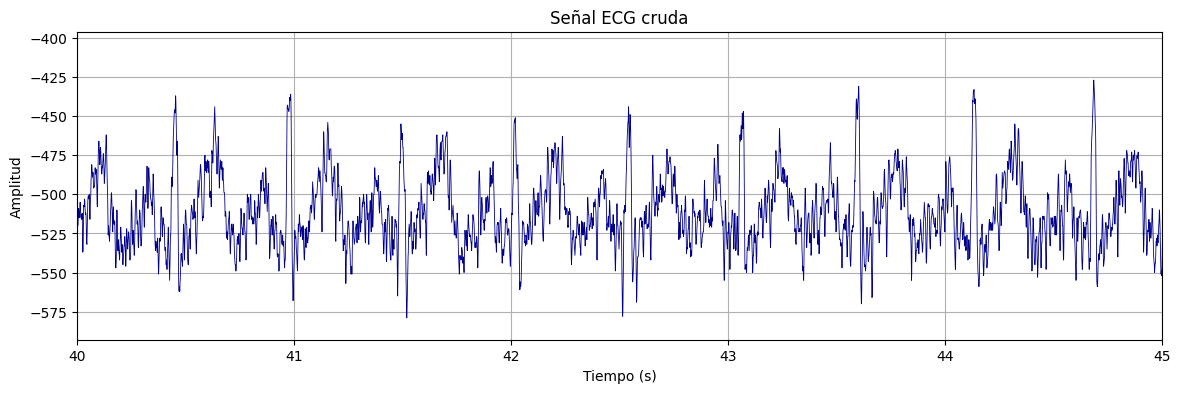

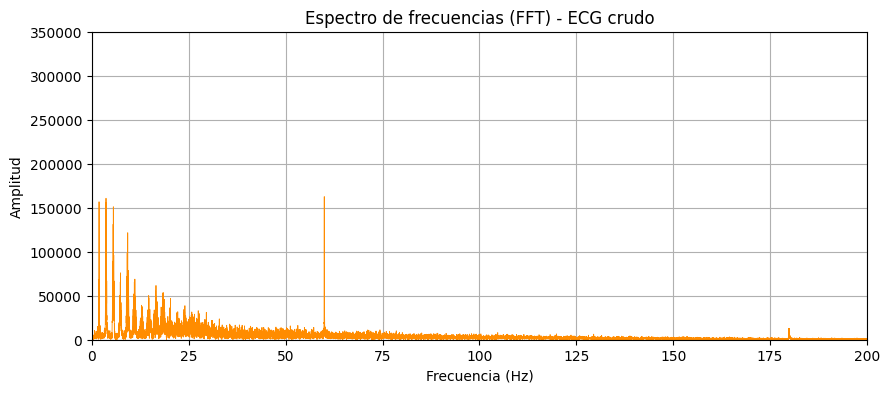

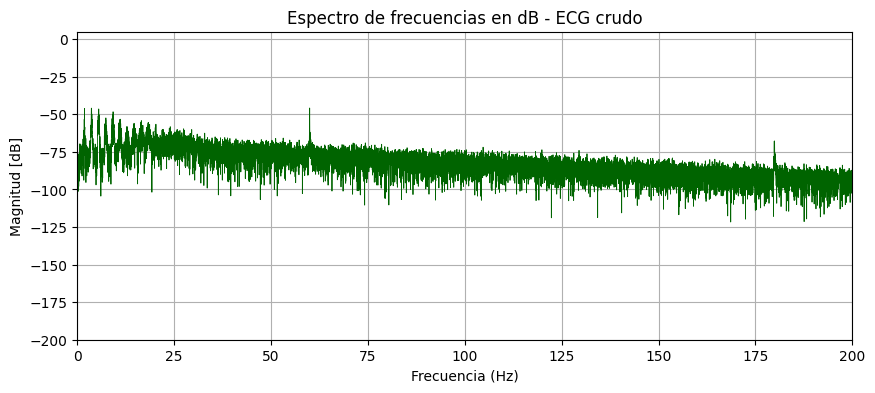

In [51]:
# Ploteo de señales
# Señal cruda
plt.figure(figsize=(14, 4))
plt.plot(tiempo, ecg, color="darkblue", linewidth=0.6)
plt.title("Señal ECG cruda")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.xlim(40, 45)
plt.grid()
plt.show()

# FFT de señal cruda
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_cruda, np.abs(fft_vals_cruda), color="darkorange", linewidth=0.6)
plt.title("Espectro de frecuencias (FFT) - ECG crudo")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim(0, 200)
plt.ylim(0, 350000)
plt.grid()
plt.show()


# FFT de señal cruda en dB
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_cruda, fft_db_cruda, color="darkgreen", linewidth=0.6)
plt.title("Espectro de frecuencias en dB - ECG crudo")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud [dB]")
plt.xlim(0, 200)
plt.ylim(-200, 5)
plt.grid()
plt.show()


### 4.6 Señal filtrada (toma 2)

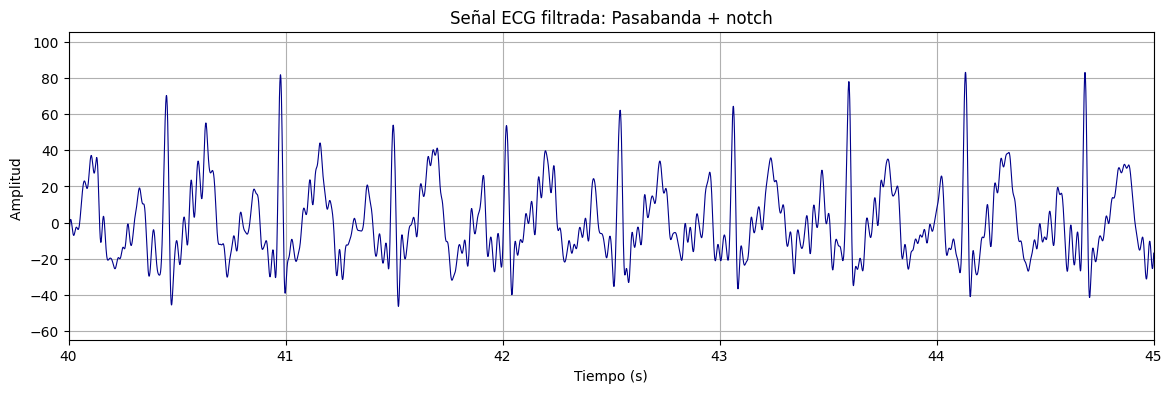

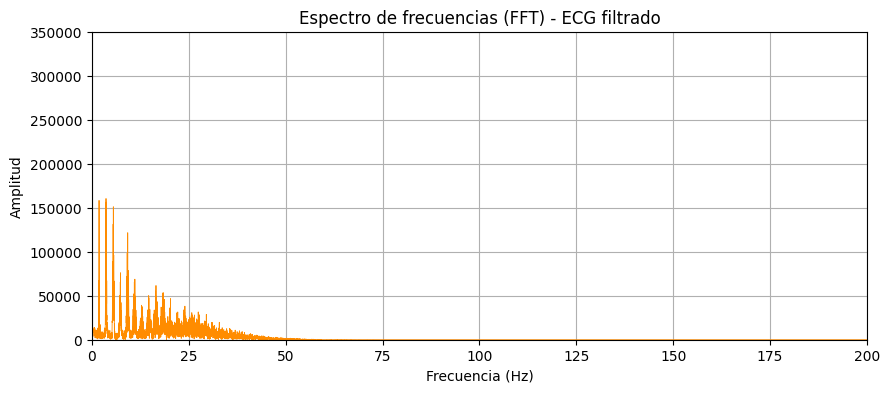

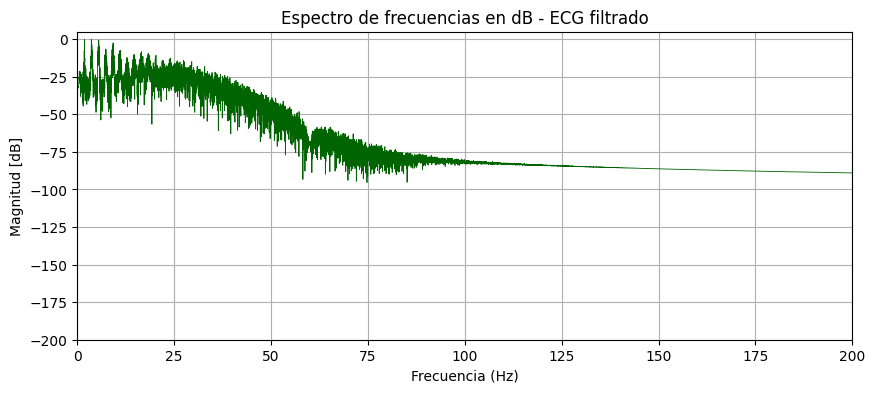

In [52]:
# Señal filtrada zoom
plt.figure(figsize=(14, 4))
plt.plot(tiempo, ecg_filtrado, color="darkblue", linewidth=0.8)
plt.title("Señal ECG filtrada: Pasabanda + notch" )
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud ")
plt.xlim(40, 45)
plt.grid()
plt.show()

# FFT de señal filtrada
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_filtrada, np.abs(fft_vals_filtrada), color="darkorange", linewidth=0.6)
plt.title("Espectro de frecuencias (FFT) - ECG filtrado")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim(0, 200)
plt.ylim(0, 350000)
plt.grid()
plt.show()

# FFT de señal filtrada en dB
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_filtrada, fft_db_filtrada, color="darkgreen", linewidth=0.6)
plt.title("Espectro de frecuencias en dB - ECG filtrado")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud [dB]")
plt.xlim(0, 200)
plt.ylim(-200, 5)
plt.grid()
plt.show()